In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [4]:
style.use('ggplot')
start = dt.datetime(2011,1,1)
end = dt.datetime(2015,1,1)
df=web.DataReader('TQQQ','yahoo',start,end)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,9.488125,9.850625,9.486875,9.660000,9.655790,5563200
2011-01-04,9.781250,9.783750,9.460625,9.645000,9.640799,5480000
2011-01-05,9.549375,9.888750,9.536875,9.884375,9.880068,5120000
2011-01-06,9.919375,9.996875,9.858125,9.973750,9.969404,4355200
2011-01-07,10.024375,10.041250,9.661875,9.950625,9.946290,6350400


In [6]:
df.to_csv('tqqq.csv')

In [8]:
df=pd.read_csv('tqqq.csv',parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,9.488125,9.850625,9.486875,9.660000,9.655790,5563200
2011-01-04,9.781250,9.783750,9.460625,9.645000,9.640799,5480000
2011-01-05,9.549375,9.888750,9.536875,9.884375,9.880068,5120000
2011-01-06,9.919375,9.996875,9.858125,9.973750,9.969404,4355200
2011-01-07,10.024375,10.041250,9.661875,9.950625,9.946290,6350400


In [11]:
df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()

In [25]:
print df.head()

                 Open       High       Low     Close  Adj Close   Volume  \
Date                                                                       
2011-01-03   9.488125   9.850625  9.486875  9.660000   9.655790  5563200   
2011-01-04   9.781250   9.783750  9.460625  9.645000   9.640799  5480000   
2011-01-05   9.549375   9.888750  9.536875  9.884375   9.880068  5120000   
2011-01-06   9.919375   9.996875  9.858125  9.973750   9.969404  4355200   
2011-01-07  10.024375  10.041250  9.661875  9.950625   9.946290  6350400   

               100ma  
Date                  
2011-01-03  9.655790  
2011-01-04  9.648295  
2011-01-05  9.725552  
2011-01-06  9.786515  
2011-01-07  9.818470  


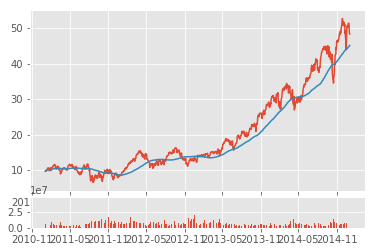

In [15]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [30]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

df_ohlc2=df.resample('10D').agg({'Open':'first',
                                'High': 'max',
                                'Low': 'min',
                                'Adj Close': 'last'})
print df_ohlc.head()
print df_ohlc2.head()
df.head(10)

                 open       high        low      close
Date                                                  
2011-01-03   9.655790  10.309257   9.640799  10.309257
2011-01-13  10.341742  10.650356   9.832588   9.832588
2011-01-23  10.238661  10.634739   9.832588  10.532284
2011-02-02  10.484805  11.316317  10.484805  11.316317
2011-02-12  11.387536  11.568083  11.358174  11.492491
                 High       Open        Low  Adj Close
Date                                                  
2011-01-03  10.320000   9.488125   9.460625  10.309257
2011-01-13  10.709375  10.350625   9.830000   9.832588
2011-01-23  10.728125   9.891875   9.656250  10.532284
2011-02-02  11.328125  10.481250  10.179375  11.316317
2011-02-12  11.664375  11.318750  11.201250  11.492491


,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2011-01-03,9.488125,9.850625,9.486875,9.660000,9.655790,5563200,9.655790
2011-01-04,9.781250,9.783750,9.460625,9.645000,9.640799,5480000,9.648295
2011-01-05,9.549375,9.888750,9.536875,9.884375,9.880068,5120000,9.725552
2011-01-06,9.919375,9.996875,9.858125,9.973750,9.969404,4355200,9.786515
2011-01-07,10.024375,10.041250,9.661875,9.950625,9.946290,6350400,9.818470
2011-01-10,9.875000,10.113125,9.809375,10.062500,10.058115,3585600,9.858411
2011-01-11,10.185000,10.206875,10.005625,10.108750,10.104345,4580800,9.893544
2011-01-12,10.248750,10.320000,10.130625,10.313750,10.309257,5587200,9.945508
2011-01-13,10.350625,10.409375,10.246875,10.346250,10.341742,5476800,9.989534


In [31]:
df_ohlc2.reset_index(inplace=True)
print df_ohlc2.head()

        Date       High       Open        Low  Adj Close
0 2011-01-03  10.320000   9.488125   9.460625  10.309257
1 2011-01-13  10.709375  10.350625   9.830000   9.832588
2 2011-01-23  10.728125   9.891875   9.656250  10.532284
3 2011-02-02  11.328125  10.481250  10.179375  11.316317
4 2011-02-12  11.664375  11.318750  11.201250  11.492491


In [32]:


df_ohlc2['Date']=df_ohlc2['Date'].map(mdates.date2num)

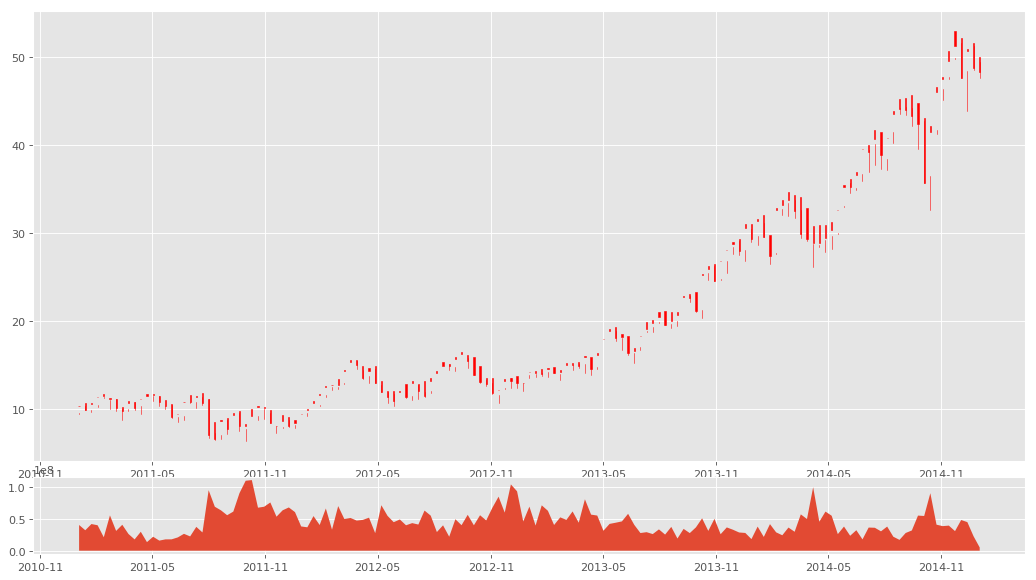

In [43]:
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc2.values,width=2, colorup='#77d879')
# I don't know why the candle stick's color won't change

ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [2]:
from gdu_modules import readcsv_strings_to_list as rt

tickers=rt("sp500list.txt")

print tickers

[['MMM'], ['ACE'], ['ABT'], ['ANF'], ['ACN'], ['ADBE'], ['AMD'], ['AES'], ['AET'], ['AFL'], ['A'], ['GAS'], ['APD'], ['ARG'], ['AKAM'], ['AA'], ['ALXN'], ['ATI'], ['AGN'], ['ALL'], ['ANR'], ['ALTR'], ['MO'], ['AMZN'], ['AEE'], ['AEP'], ['AXP'], ['AIG'], ['AMT'], ['AMP'], ['ABC'], ['AMGN'], ['APH'], ['APC'], ['ADI'], ['AON'], ['APA'], ['AIV'], ['APOL'], ['AAPL'], ['AMAT'], ['ADM'], ['AIZ'], ['T'], ['ADSK'], ['ADP'], ['AN'], ['AZO'], ['AVB'], ['AVY'], ['AVP'], ['BHI'], ['BLL'], ['BAC'], ['BK'], ['BCR'], ['BAX'], ['BBT'], ['BEAM'], ['BDX'], ['BBBY'], ['BMS'], ['BRK.B'], ['BBY'], ['BIG'], ['BIIB'], ['BLK'], ['HRB'], ['BMC'], ['BA'], ['BWA'], ['BXP'], ['BSX'], ['BMY'], ['BRCM'], ['BF.B'], ['CHRW'], ['CA'], ['CVC'], ['COG'], ['CAM'], ['CPB'], ['COF'], ['CAH'], ['CFN'], ['KMX'], ['CCL'], ['CAT'], ['CBG'], ['CBS'], ['CELG'], ['CNP'], ['CTL'], ['CERN'], ['CF'], ['SCHW'], ['CHK'], ['CVX'], ['CMG'], ['CB'], ['CI'], ['CINF'], ['CTAS'], ['CSCO'], ['C'], ['CTXS'], ['CLF'], ['CLX'], ['CME'], ['CMS'],

In [23]:
style.use('ggplot')
start = dt.datetime(2011,1,1)
end = dt.datetime(2015,1,1)
df = web.DataReader(tickers[1],'yahoo',start,end)

RemoteDataError: No data fetched using 'YahooDailyReader'

In [24]:
print tickers[1]

['ACE']


In [60]:
a[5]

IndexError: list index out of range